Welcome to my Notebook! in this notebook, I will use machine learning to analyze Lending Club's Loan Data to try to predict future defaults among current loans. The dataset is large, so we will only use a sample of it to actually train the machine learning models before using them on the dataset at large.

GOALS

Understand the distributions of the various features in the dataset and prepare the dataset for machine learning
Identify and tune an effective machine learning model on the data to identify current loans with a high risk of default
Apply the best machine learning model to the entire dataset to identify the current loans most likely to default

To start, let's import some useful libraries and read the data into a pandas dataframe. We can then take our first look at the data

In [1]:
#import useful packages for preliminary analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
#import data
original_data=pd.read_csv('/Users/neiloza/Downloads/lending-club-loan-data/loan.csv',low_memory=True)
original_data.head(20)

/Users/neiloza/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,5550,5550,5550.0,36 months,15.02,192.45,C,C3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,2000,2000,2000.0,36 months,17.97,72.28,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,6000,6000,6000.0,36 months,13.56,203.79,C,C1,...,NaN,NaN,DirectPay,N,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,6000,6000,6000.0,36 months,14.47,206.44,C,C2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
original_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 145 columns):
id                                            float64
member_id                                     float64
loan_amnt                                     int64
funded_amnt                                   int64
funded_amnt_inv                               float64
term                                          object
int_rate                                      float64
installment                                   float64
grade                                         object
sub_grade                                     object
emp_title                                     object
emp_length                                    object
home_ownership                                object
annual_inc                                    float64
verification_status                           object
issue_d                                       object
loan_status                       

The dataset is roughly 2,000,000 rows by 150 columns. Of these columns, several seem mostly comprised of null values. If a column contains mostly null values, it is not well suited for machine learning. Let's take a look at the distribution of null values in the dataset

In [6]:
original_data.isnull().sum()

id                                            2260668
member_id                                     2260668
loan_amnt                                           0
funded_amnt                                         0
funded_amnt_inv                                     0
term                                                0
int_rate                                            0
installment                                         0
grade                                               0
sub_grade                                           0
emp_title                                      166969
emp_length                                     146907
home_ownership                                      0
annual_inc                                          4
verification_status                                 0
issue_d                                             0
loan_status                                         0
pymnt_plan                                          0
url                         

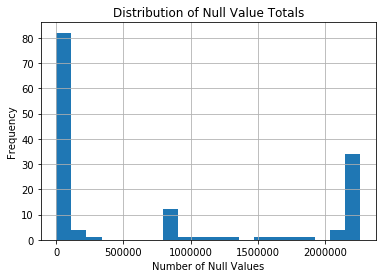

In [4]:
#check how many null values there are
original_data.isnull().sum().hist(bins=20)
plt.title('Distribution of Null Value Totals')
plt.xlabel('Number of Null Values')
plt.ylabel('Frequency')
plt.show()

In [5]:
original_data.isnull().sum()[original_data.isnull().sum()>800000]

id                                            2260668
member_id                                     2260668
url                                           2260668
desc                                          2134601
mths_since_last_delinq                        1158502
mths_since_last_record                        1901512
next_pymnt_d                                  1303607
mths_since_last_major_derog                   1679893
annual_inc_joint                              2139958
dti_joint                                     2139962
verification_status_joint                     2144938
open_acc_6m                                    866130
open_act_il                                    866129
open_il_12m                                    866129
open_il_24m                                    866129
mths_since_rcnt_il                             909924
total_bal_il                                   866129
il_util                                       1068850
open_rv_12m                 

In [7]:
#Removing columns with many null values
entries=len(original_data.index)
percentile=.4
loan_data=original_data.dropna(thresh=int(percentile*entries),axis=1)


The histogram above shows the frequency of different numbers of null values. It seems most columns have few or no null values, a few have around 1,000,000 null values, and another clump are either entirely or mostly comprised of null values. Even if we drop all of the rows with over 40% null values, we should still have around 100 columns. let's do that now.

Please note that the 60% threshold was chosen arbitrarily. you usually need at least 50% of a column to be not null to use it in machine learning, but 60% is a bit safer and reduces overfitting when training models.

the filtered version of the data was stored in the variable loan_data that we preserve the original dataset for reference.

Next, lets take a look at the target variable. After inspection, loan_status is the column that categorizes loans as current, defaulted, fully paid, etc. let's take a look at the frequencies of different values in that column.

In [8]:
loan_data.loan_status.value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

The column loan_status takes on a total of nine values. However, these values can be grouped into three broad categories: Fully Paid, Current, and Defaults. Fully Paid consists of the values 'Fully Paid' and 'Does not meet the credit policy. Status:Fully Paid', Current consists of the values 'Current' and 'In Grace Period', and Default consists of the remaining five values. Although the most frequent value in the Default category is 'Charged Off', the category is still called Default to follow industry standards.

For the purposes of this analysis, loans of the status 'Fully Paid' aren't very useful. This is because we are interested in which current loans are at a high risk of default. Since Fully Paid loans have zero risk of default, they are not very relevant to this anlysis. Rows of that category will be removed now.

In [9]:
loan_data=loan_data[loan_data.loan_status!='Fully Paid']
loan_data=loan_data[loan_data.loan_status!='Does not meet the credit policy. Status:Fully Paid']
loan_data.tail(100)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
2260538,8500,8500,8500.0,36 months,12.62,284.85,C,C1,Shipping/loader,10+ years,...,0.0,1.0,0.0,27018.0,20738.0,7000.0,20018.0,N,Cash,N
2260539,16900,16900,16900.0,36 months,21.45,640.63,D,D5,Sales consultant,3 years,...,0.0,0.0,0.0,267430.0,34455.0,15300.0,28880.0,N,Cash,N
2260540,16500,16500,16250.0,36 months,9.44,528.09,B,B1,Business Analyst,10+ years,...,20.0,0.0,0.0,297444.0,127028.0,14100.0,93826.0,N,Cash,N
2260541,30000,30000,29975.0,36 months,22.91,1159.89,E,E1,Business Development Manager,10+ years,...,100.0,0.0,0.0,393506.0,98209.0,11700.0,101710.0,N,Cash,N
2260542,18000,18000,18000.0,36 months,22.91,695.94,E,E1,Advisor,6 years,...,100.0,0.0,0.0,217838.0,194314.0,17400.0,193838.0,N,Cash,N
2260543,6000,6000,6000.0,36 months,12.62,201.07,C,C1,Secretary,4 years,...,50.0,0.0,0.0,35784.0,10423.0,14000.0,11784.0,N,Cash,N
2260544,9500,9500,9500.0,36 months,22.91,367.30,E,E1,Raw/Finish perator Technician,1 year,...,0.0,0.0,0.0,89722.0,69694.0,19500.0,52122.0,N,Cash,N
2260546,30000,30000,30000.0,36 months,18.06,1085.48,D,D2,Associate,1 year,...,100.0,0.0,0.0,210290.0,200815.0,5400.0,160504.0,N,Cash,N
2260547,6000,6000,6000.0,36 months,16.02,211.01,C,C5,NaN,NaN,...,71.4,0.0,0.0,27963.0,17308.0,3700.0,14863.0,N,Cash,N
2260548,5200,5200,5200.0,36 months,25.82,209.02,E,E4,NaN,NaN,...,NaN,0.0,0.0,18872.0,13270.0,0.0,16172.0,N,Cash,N


In [10]:
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1216728 entries, 0 to 2260667
Data columns (total 103 columns):
loan_amnt                     int64
funded_amnt                   int64
funded_amnt_inv               float64
term                          object
int_rate                      float64
installment                   float64
grade                         object
sub_grade                     object
emp_title                     object
emp_length                    object
home_ownership                object
annual_inc                    float64
verification_status           object
issue_d                       object
loan_status                   object
pymnt_plan                    object
purpose                       object
title                         object
zip_code                      object
addr_state                    object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line              object
inq_last_6mths                f

Next, in order to use machine learning to predict loan status, we need to remove any features too tightly correlated to loan_status. this is to prevent data leakage, which is when data that isn't known before an event is used to predict an event. for example, if you wanted to determine whether it rained on a given day, you can't use inches of rainfall to train your model since you only have nonzero values of inches of rainfall when it rains. In this case, we would be looking to remove features such as recoveries, which only take on certain values when the loan is in default. To determine which features should be removed for fear of leakage, I will plot the values of both Current and Default loans for every feature. I will use a histogram for the numeric features and a bar graph for the categorical features. Any variables with significantly different distributions between Default and Current Loans will be removed. Let's plot those graphs noe

(0)


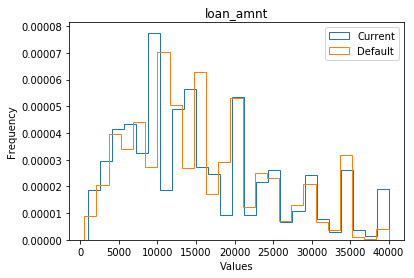

(1)


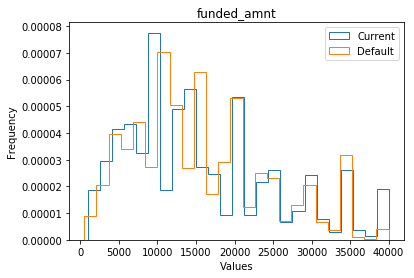

(2)


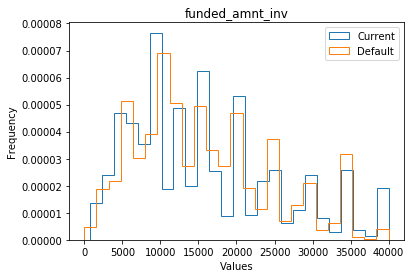

(3)


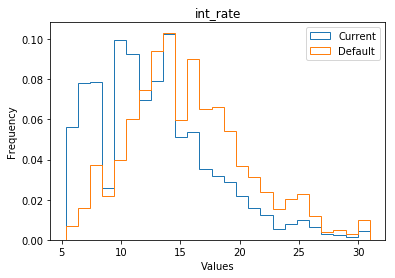

(4)


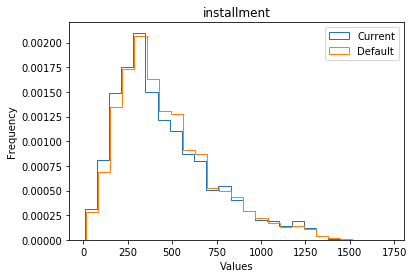

(5)


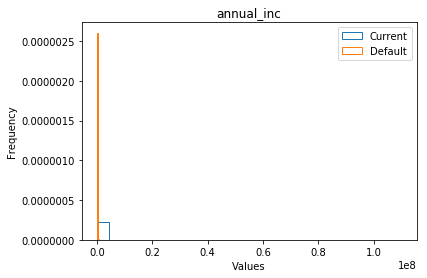

(6)


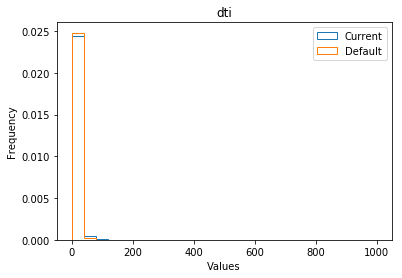

(7)


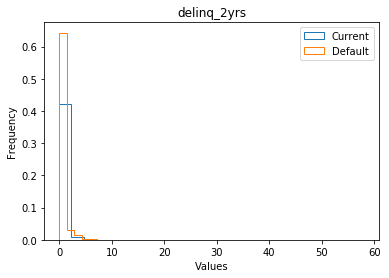

(8)


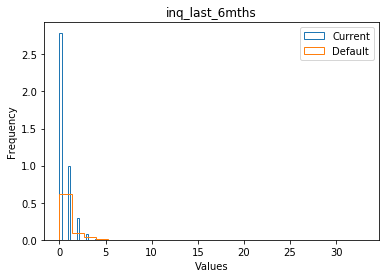

(9)


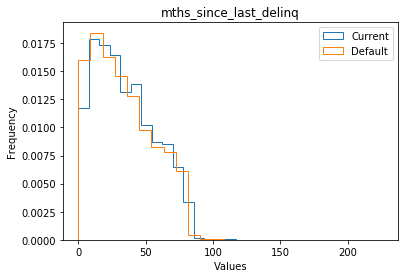

(10)


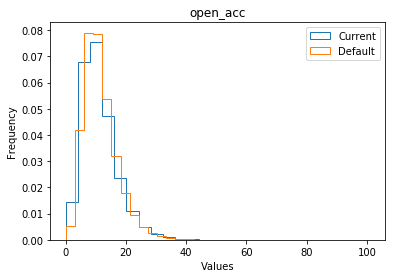

(11)


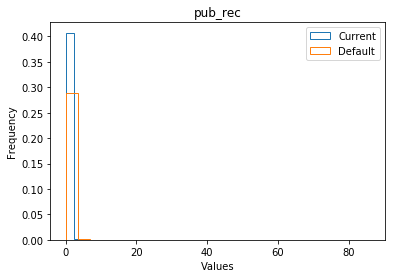

(12)


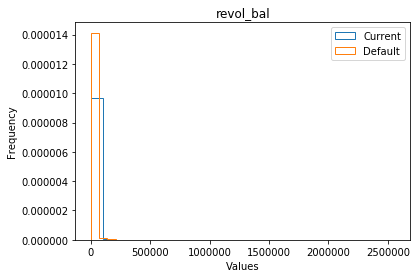

(13)


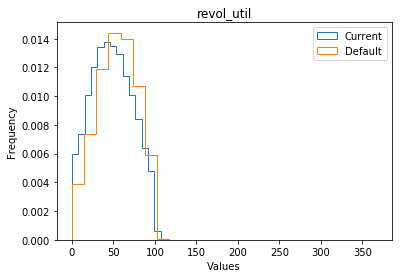

(14)


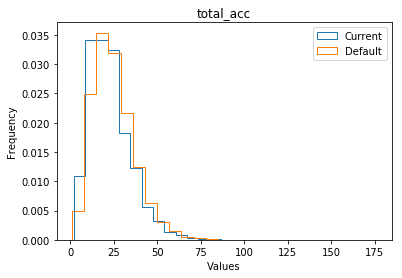

(15)


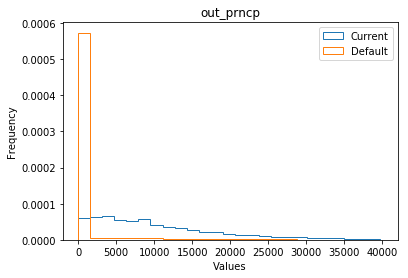

(16)


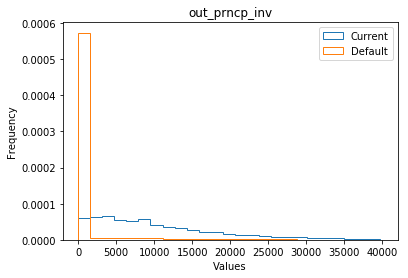

(17)


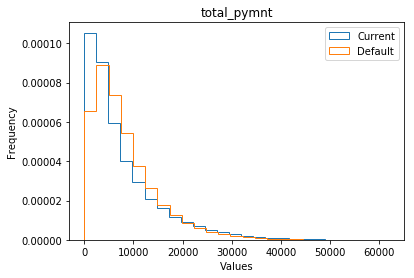

(18)


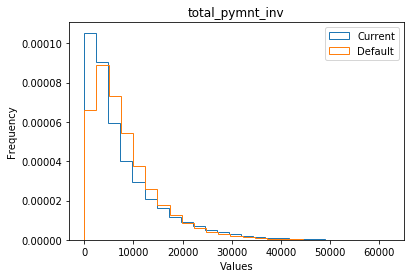

(19)


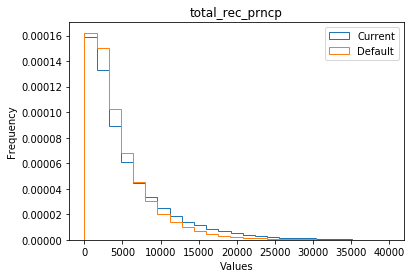

(20)


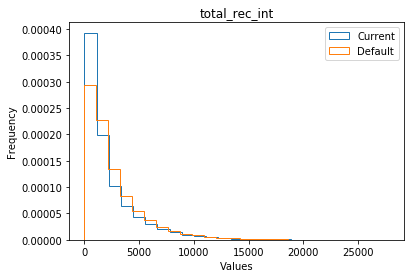

(21)


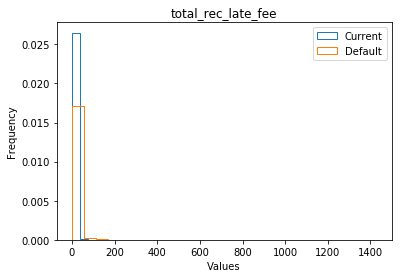

(22)


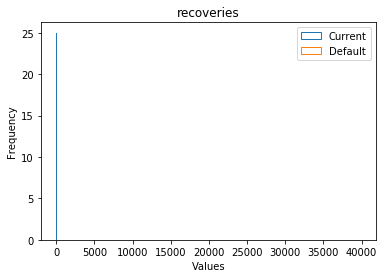

(23)


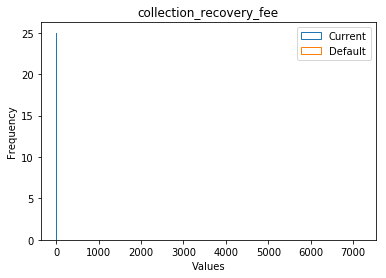

(24)


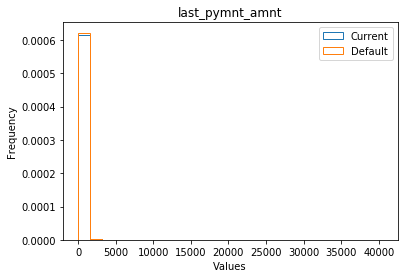

(25)


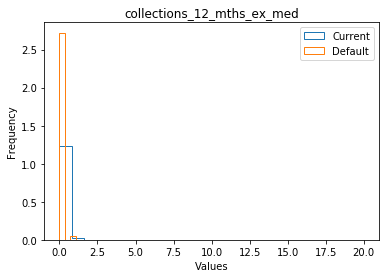

(26)


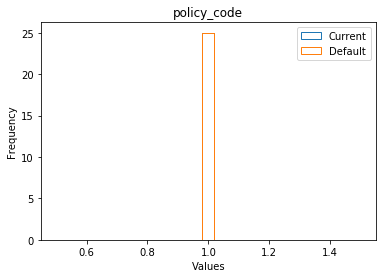

(27)


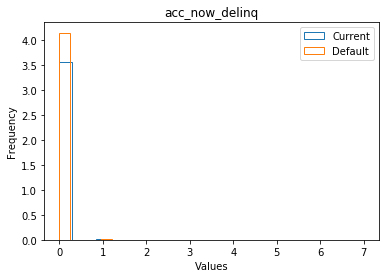

(28)


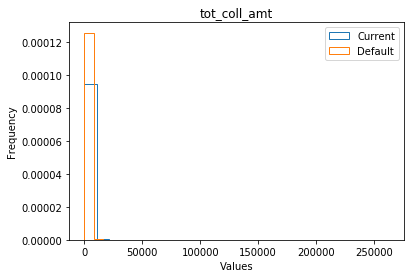

(29)


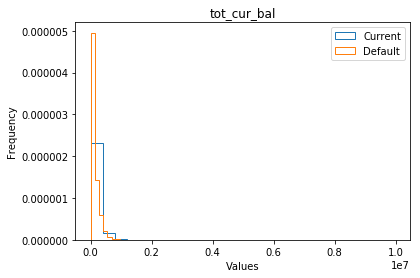

(30)


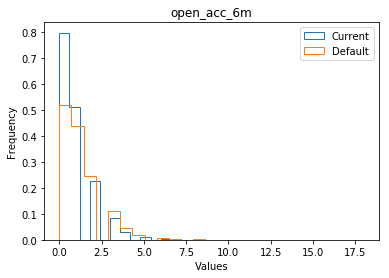

(31)


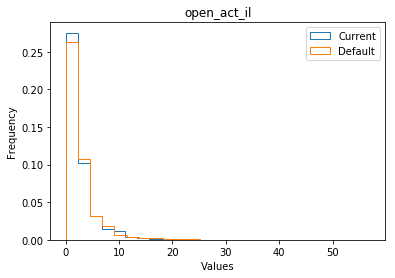

(32)


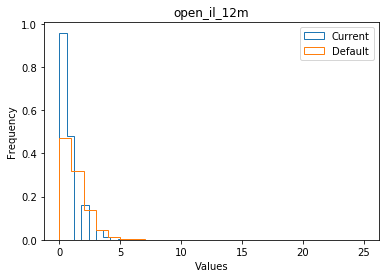

(33)


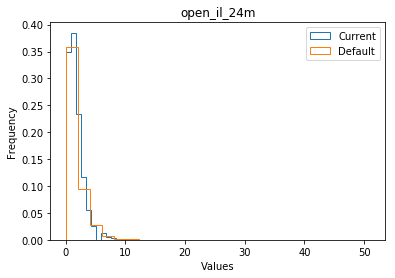

(34)


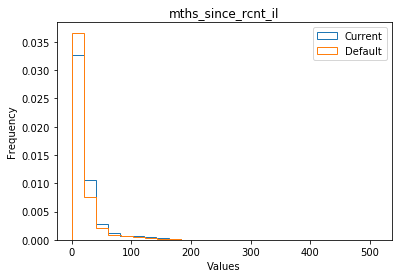

(35)


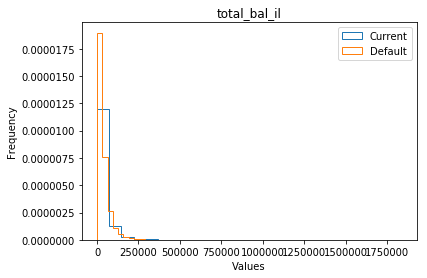

(36)


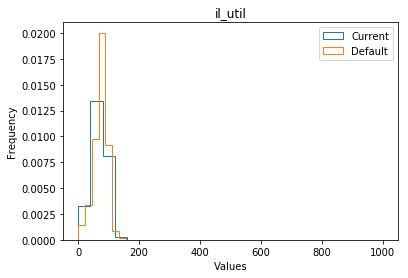

(37)


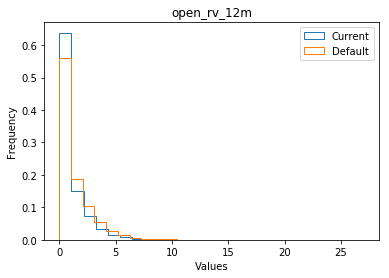

(38)


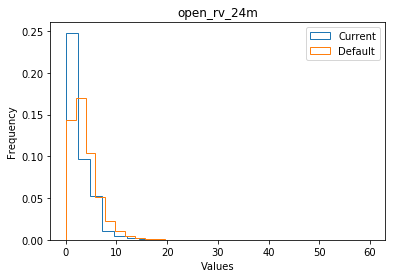

(39)


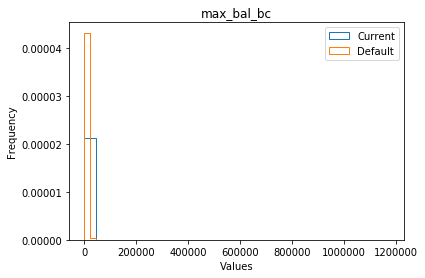

(40)


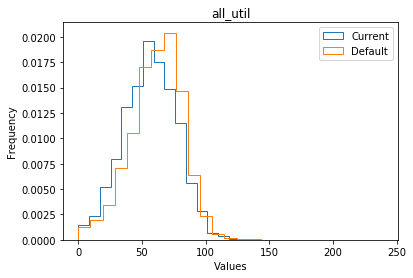

(41)


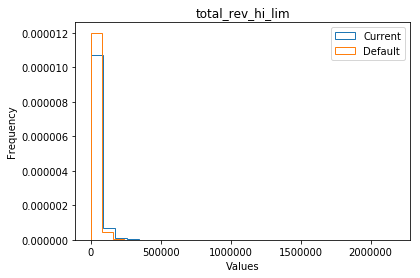

(42)


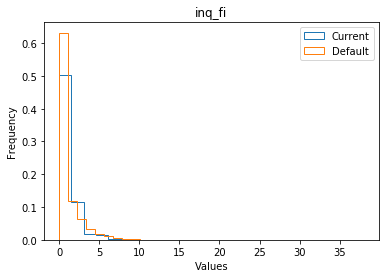

(43)


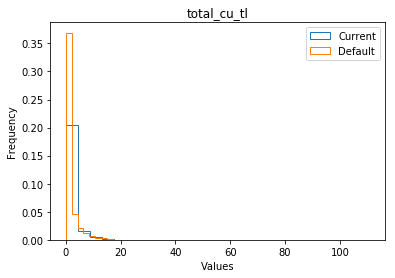

(44)


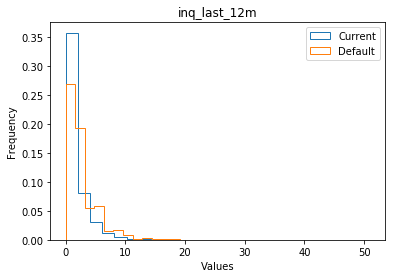

(45)


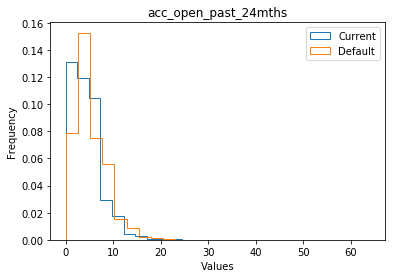

(46)


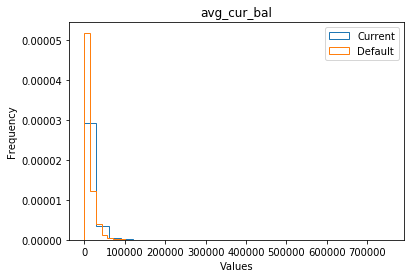

(47)


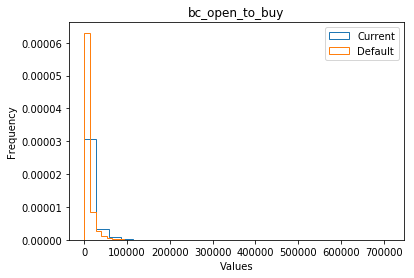

(48)


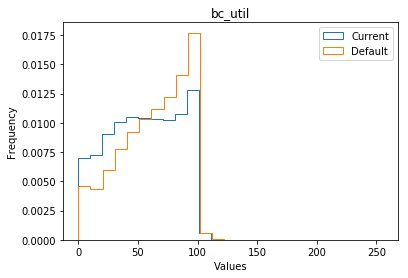

(49)


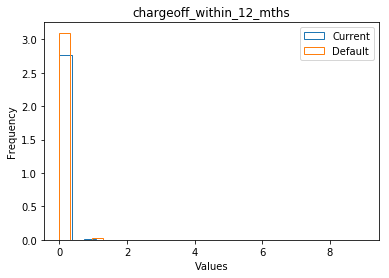

(50)


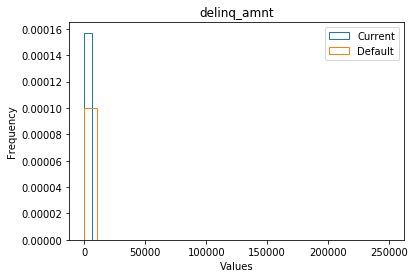

(51)


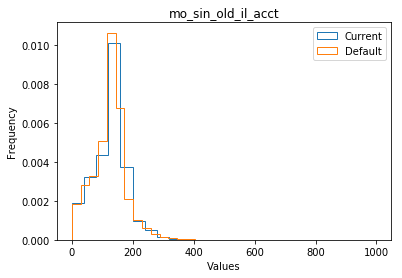

(52)


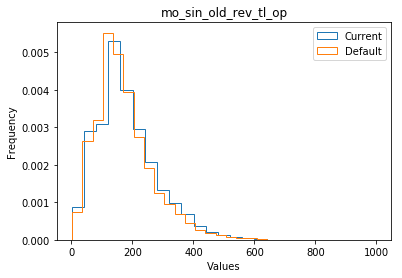

(53)


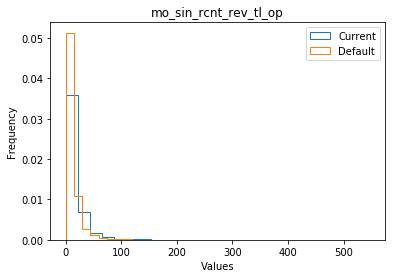

(54)


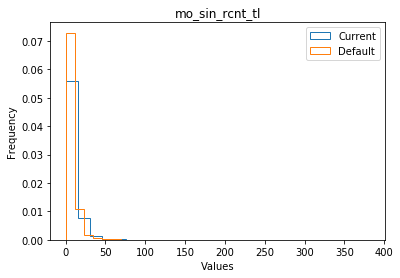

(55)


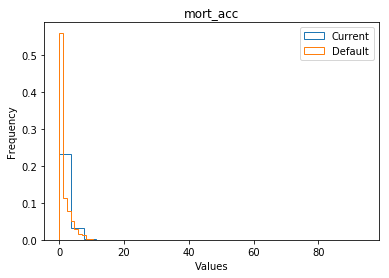

(56)


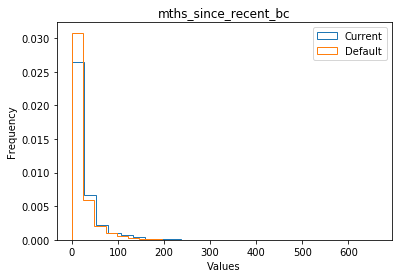

(57)


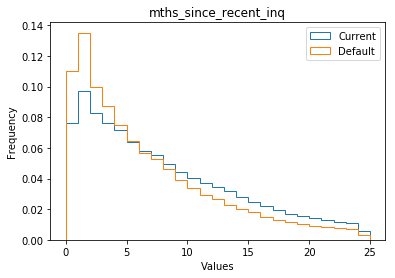

(58)


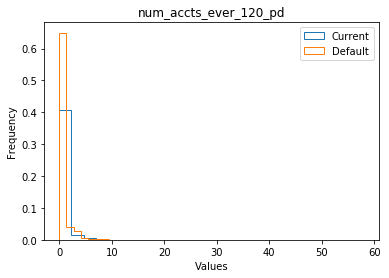

(59)


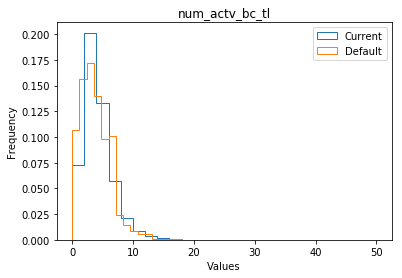

(60)


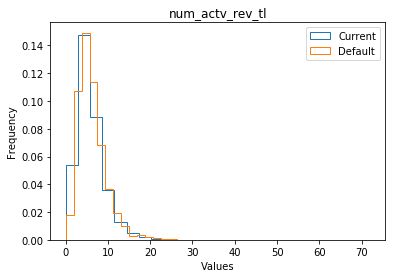

(61)


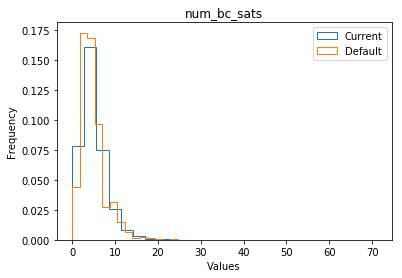

(62)


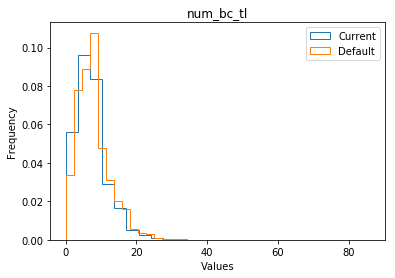

(63)


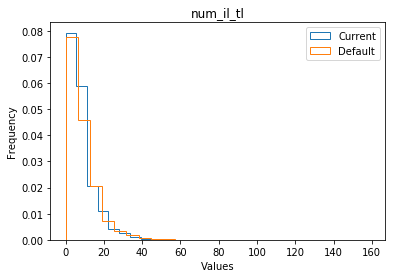

(64)


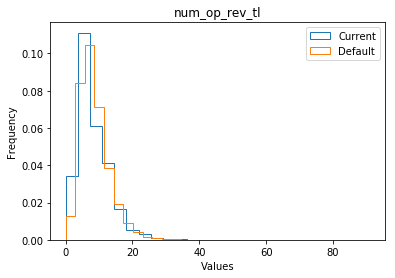

(65)


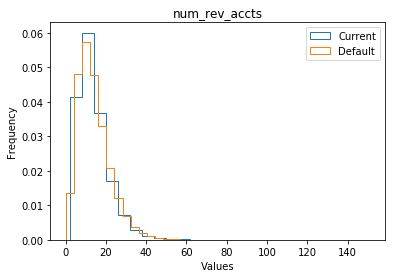

(66)


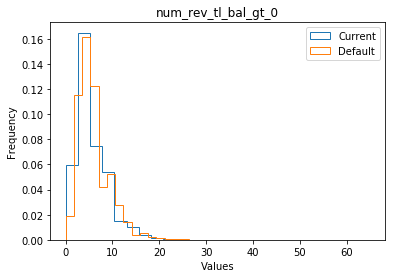

(67)


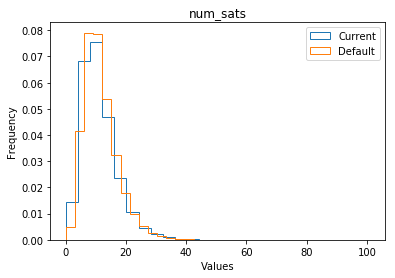

(68)


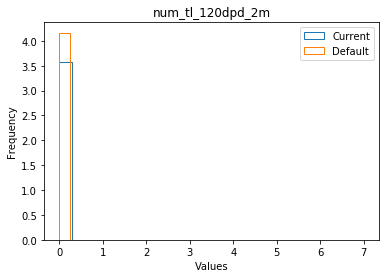

(69)


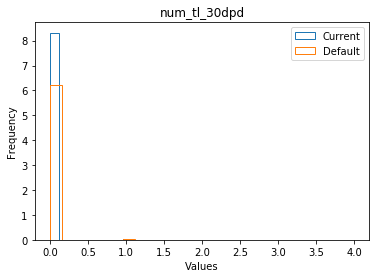

(70)


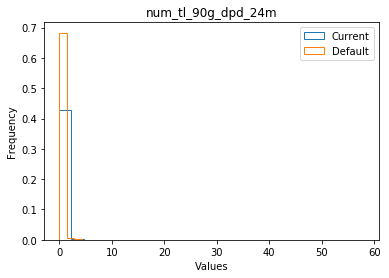

(71)


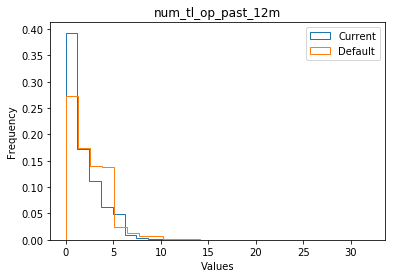

(72)


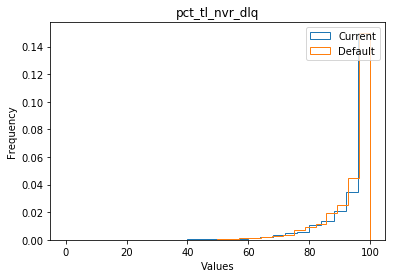

(73)


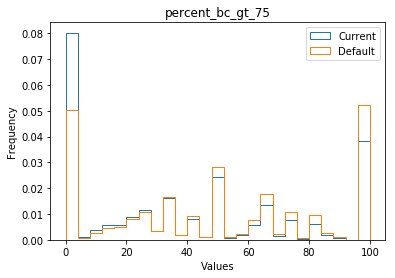

(74)


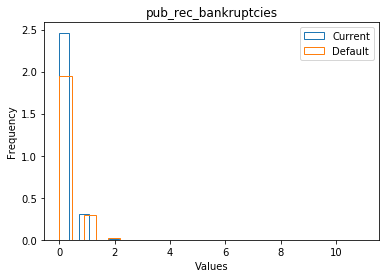

(75)


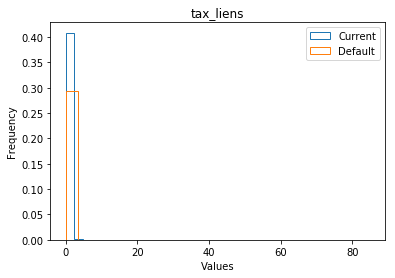

(76)


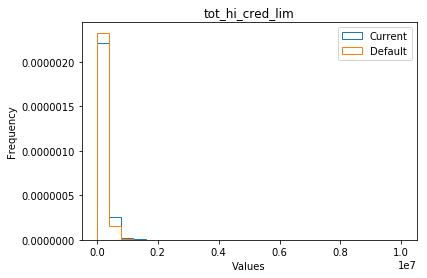

(77)


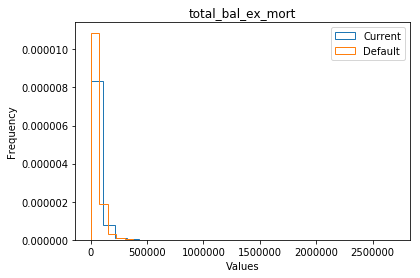

(78)


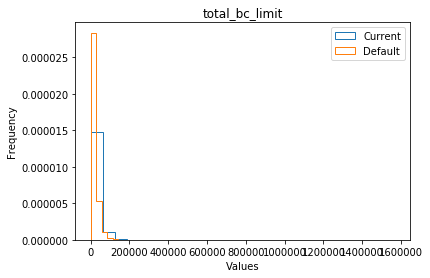

(79)


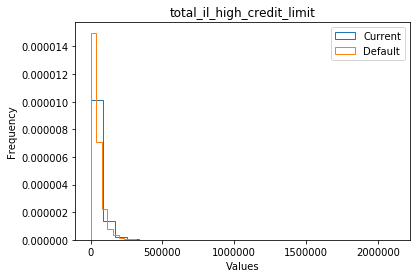

In [11]:
#histograms for numeric features
loan_status_column=loan_data.loan_status
count=0
for column in loan_data.columns:
    if(loan_data[column].dtype == np.float64 or loan_data[column].dtype == np.int64):
        print('('+str(count)+')')
        loan_data[(loan_status_column=='Current')|(loan_status_column=='In Grace Period')][column].plot(kind='hist',bins=25, histtype='step',density=True)
        loan_data[((loan_status_column!='Current')&(loan_status_column!='In Grace Period'))][column].plot(kind='hist',bins=25, histtype='step',density=True)
        plt.legend(['Current','Default'])
        plt.title(str(column))
        plt.xlabel('Values')
        plt.ylabel('Frequency')
        plt.show()
        count=count+1
        

(0)


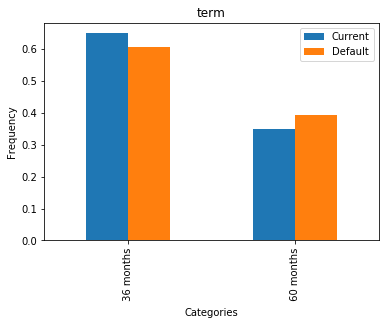

(1)


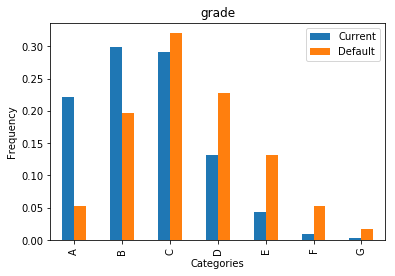

(2)
sub_grade cannot be plotted due too too many possible values
(3)
emp_title cannot be plotted due too too many possible values
(4)


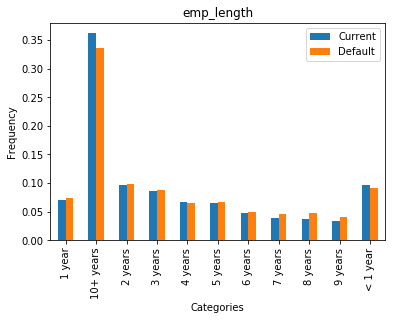

(5)


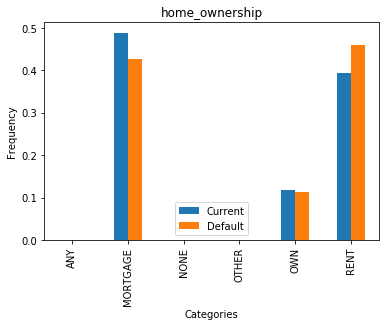

(6)


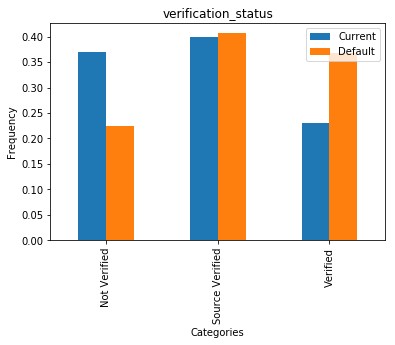

(7)
issue_d cannot be plotted due too too many possible values
(8)


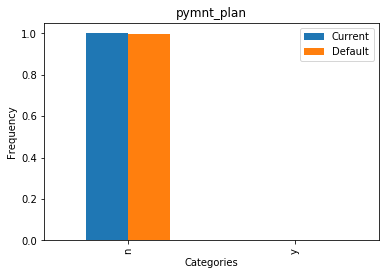

(9)
purpose cannot be plotted due too too many possible values
(10)
title cannot be plotted due too too many possible values
(11)
zip_code cannot be plotted due too too many possible values
(12)
addr_state cannot be plotted due too too many possible values
(13)
earliest_cr_line cannot be plotted due too too many possible values
(14)


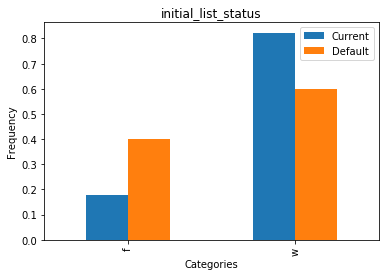

(15)
last_pymnt_d cannot be plotted due too too many possible values
(16)
next_pymnt_d cannot be plotted due too too many possible values
(17)
last_credit_pull_d cannot be plotted due too too many possible values
(18)


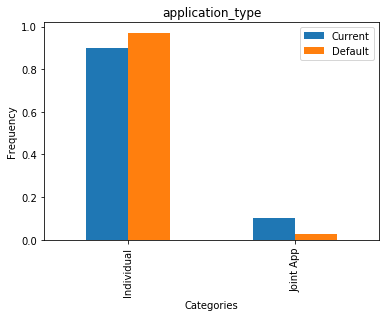

(19)


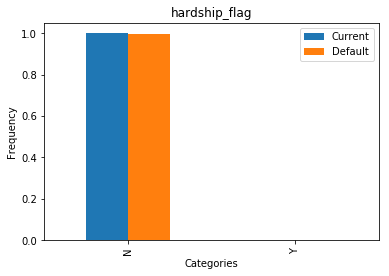

(20)


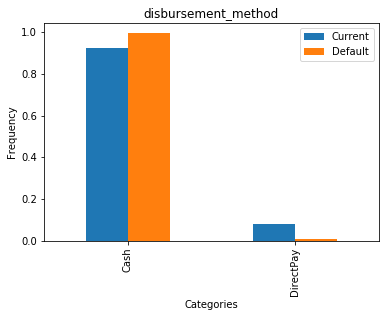

(21)


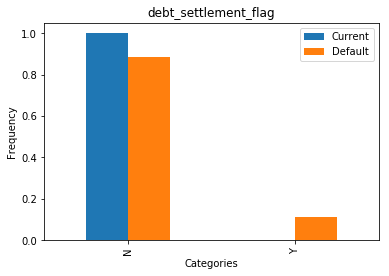

In [12]:
#bar graphs for categorical features
count=0
for column in loan_data.columns:
    if((loan_data[column].dtype == 'O')&(column!='loan_status')):
        print('('+str(count)+')')
        count=count+1
        if(loan_data[column].value_counts().size<12):
            temp=pd.DataFrame()
            temp.loc[:,'status']=loan_status_column.apply(lambda x: 0 if x=='Current'or x=='In Grace Period' else 1)
            temp.loc[:,column]=loan_data[column]
            temp.loc[:,'number']=range(loan_status_column.size)
            temp=temp.groupby([column,'status']).agg('count').unstack(level=1)
            temp.columns=temp.columns.droplevel()
            temp.iloc[:,0]=temp.iloc[:,0]/temp[0].sum()
            temp.iloc[:,1]=temp.iloc[:,1]/temp[1].sum()
            temp.plot(kind='bar')
            plt.legend(['Current','Default'])
            plt.xlabel('Categories')
            plt.ylabel('Frequency')
            plt.title(str(column))
            plt.show()
        else:
            print(str(column)+' cannot be plotted due too too many possible values')
    
            

Most features show some slight differences between Current and Default loans, while a few are more egregious. Numeric categories such as out_prncp and recoveries show striking differences between current and default loans, and the categorical variable debt_settlement_flag only takes on the value 'y' when in Default. Those categories and categories like them will be removed. However, there were also some categorical variables that could not be plotted due to having too many possible values. many of these will be removed due to difficulty encoding, but a couple, such as sub_grade, can be kept. In addition, analyzing the column issue_d (stands for issue date) could reveal some seasonality in defaults. Let's convert that feature into a datetime and check for yearly seasonality.

In [8]:
loan_data.issue_d=pd.to_datetime(loan_data.issue_d)
loan_data['month_issued']=loan_data.issue_d.dt.month
loan_data[(loan_status_column=='Current')|(loan_status_column=='In Grace Period')]['month_issued'].plot(kind='hist',bins=12, histtype='step',density=True)
loan_data[((loan_status_column!='Current')&(loan_status_column!='In Grace Period'))]['month_issued'].plot(kind='hist',bins=12, histtype='step',density=True)
plt.legend(['Current','Default'])
plt.title('Loan Types by Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()
          



/Users/neiloza/miniconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


NameError: name 'loan_status_column' is not defined

It seems that defaults are more likely during the beginning of the year. the data seems useful enough to keep in the dataset. Now let us drop the unneeded columns

In [14]:
columns_to_drop=['emp_title','title','pymnt_plan','zip_code','out_prncp','addr_state', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv','total_rec_prncp', 'total_rec_int', 'total_rec_late_fee','recoveries', 'collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d','issue_d','earliest_cr_line','debt_settlement_flag']

In [15]:
loan_data=loan_data.drop(columns_to_drop,axis=1)

Now we have finished cleaning the data of unneeded columns and rows. Now we can begin training our models. To start, let's take a sample of our data to train our models. Once we identify the best model and tune its parameters, we will apply the model to the entirety of loan_data. 

In [ ]:
sample=loan_data.sample(n=20000)

Now that we have a subset of our data, let's transform it into the target variable and the featureset. As mentioned earlier loan_status is the column that best works as a target variable. However, since we are trying to categorize loans as current or Default, we need to encode the target variable as a binary classifier. all values in loan_status with the values 'Current' and 'In Grac e PEriod' will be mapped to the value 0 and all other values, representing default, will be mapped to 1. the results will be stored as y, which will represent the target variable. 

To create the featureset, we need to drop the column loan_status and encode categorical features as dummies. let's do that now

In [17]:
y=sample.loan_status
y=y.apply(lambda x: 0 if x=='Current'or x=='In Grace Period' else 1)
loan_data=sample.drop(['loan_status'],axis=1)
dummied_loan_data=pd.get_dummies(loan_data,drop_first=True)


Next we need to handle n/a values in the feature set. different machine learning algorithms like different fill methods for null values; some prefer the mean to be used in place of null values while others prefer the median. We will create two different versions of the featureset, one using each fill method.

In addition, some machine learning algorithms like their variables normalized. We will also create normalized versions of both featuresets.

In [18]:
X_fillna_median=dummied_loan_data.fillna(dummied_loan_data.median())
X_fillna_mean=dummied_loan_data.fillna(dummied_loan_data.mean())
X_normed_mean=normalize(X_fillna_mean)
X_normed_median=normalize(X_fillna_median)                       
                       
                       
                        
                       


/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2798: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Perfect! now that we have the target variable and featureset ready for training/testing, lets instantiate the machine learning models. They are Logistic Regression, Random Forest, Spupport Vector Classifier, Naive Bayes Classifier, and XGBoost. let's do that now

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
rf=RandomForestClassifier()
lr=LogisticRegression()
gnb=GaussianNB()
svc=SVC(probability=True)




Perfect. Now let's train these models ans evaluate their performance. To do this, we need to split the data into train and test sets and plot/print performance metrics. Rather than doing that for each model, we'll create a function that can do it for us. 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve as prc,f1_score, recall_score, precision_score, roc_auc_score,roc_curve,accuracy_score

In [21]:
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve, plot_precision_recall, plot_roc_curve

In [22]:
def evaluate_model(X,y, model):
    #perform train-test split
    func_X_train,func_X_test,func_y_train, func_y_test=train_test_split(X,y,test_size=.25,random_state=42)
    #train the model
    model.fit(func_X_train,func_y_train)
    #Create predicted probability distributions
    prob_of_1=model.predict_proba(func_X_test)[:,1]
    prob_truth=pd.concat([pd.DataFrame(prob_of_1),pd.DataFrame(func_y_test).reset_index().loan_status],axis=1)
    prob_truth.columns=['Probability','Default']
    prob_current=prob_truth[prob_truth.Default==0].Probability
    prob_default=prob_truth[prob_truth.Default==1].Probability
    prob_current.plot.hist(alpha=.5,bins=10)
    prob_default.plot.hist(alpha=.5,bins=10)
    plt.xlim(0,1)
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title('Prediction Distributions for Default and Current Loans')
    plt.legend(['Current','Default'])
    plt.show()
    #plot roc curve, precision recall curve, lift curve, and cumulative gain
    predict_probas=model.predict_proba(func_X_test)
    plot_roc_curve(np.array(func_y_test),predict_probas)
    plot_precision_recall(np.array(func_y_test),predict_probas)
    plot_lift_curve(np.array(func_y_test),predict_probas)
    plot_cumulative_gain(np.array(func_y_test),predict_probas)
    #calculate and print performance metrics
    print('the Precision is '+str(precision_score(y_true=func_y_test,y_pred=model.predict(func_X_test))))
    print('the Recall is '+str(recall_score(y_true=func_y_test,y_pred=model.predict(func_X_test))))
    print('the f1 score is '+str(f1_score(func_y_test,model.predict(func_X_test))))
    print('the roc-auc score is '+str(roc_auc_score(func_y_test,prob_of_1)))
    print('the accuracy score is '+str(accuracy_score(func_y_test,model.predict(func_X_test))))
    print('The number of loans predicted to default is '+str(model.predict(func_X_test).sum())+' out of a test size of '+str(len(func_y_test.index)))


Now that we can evaluate the models, compare them, and see which performs the best. lets do that now

/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


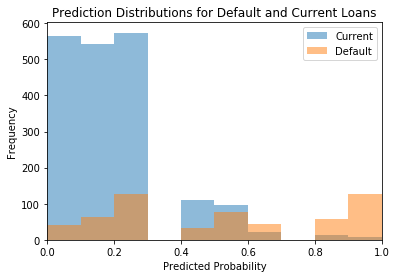

/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/neiloza/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


the Precision is 0.7738095238095238
the Recall is 0.45694200351493847
the f1 score is 0.5745856353591161
the roc-auc score is 0.8029172533240378
the accuracy score is 0.846
The number of loans predicted to default is 336 out of a test size of 2500


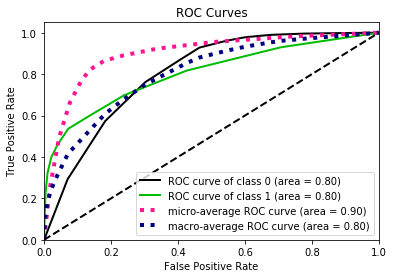

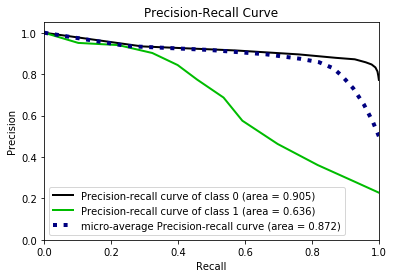

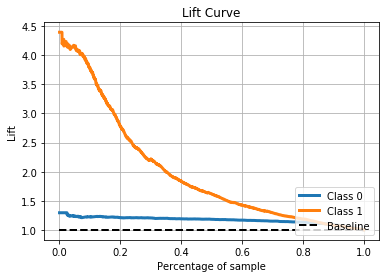

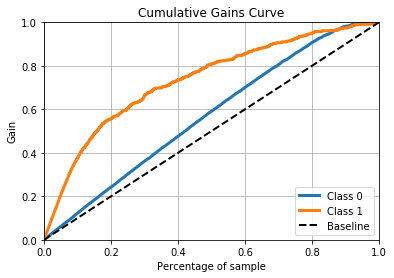

In [23]:
evaluate_model(X_fillna_median,y,rf)

/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


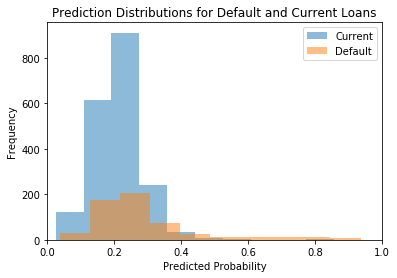

/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/neiloza/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


the Precision is 0.8636363636363636
the Recall is 0.10017574692442882
the f1 score is 0.17952755905511814
the roc-auc score is 0.6583474328298168
the accuracy score is 0.7916
The number of loans predicted to default is 66 out of a test size of 2500


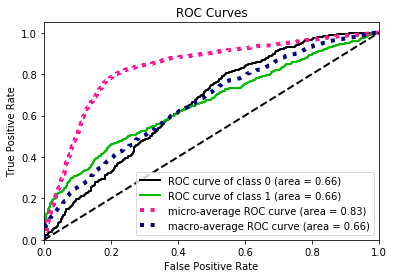

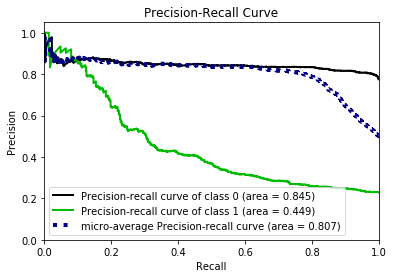

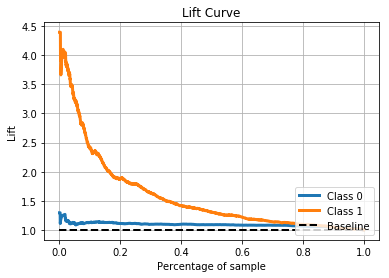

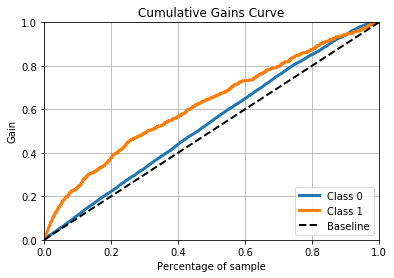

In [24]:
evaluate_model(X_normed_mean,y,lr)

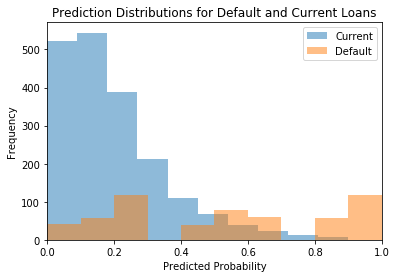

/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/neiloza/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


the Precision is 0.7700831024930748
the Recall is 0.48857644991212656
the f1 score is 0.5978494623655914
the roc-auc score is 0.8001518103935512
the accuracy score is 0.8504
The number of loans predicted to default is 361 out of a test size of 2500


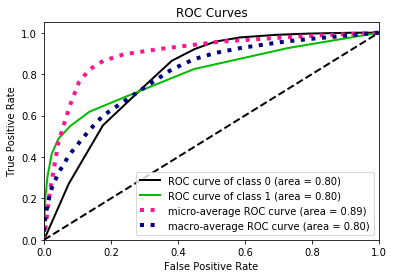

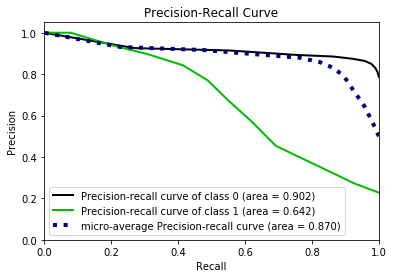

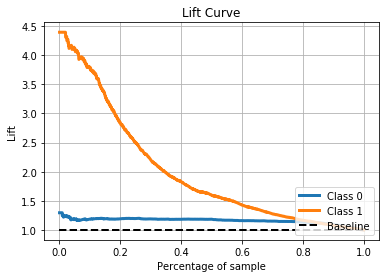

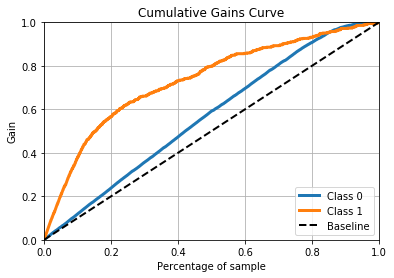

In [25]:
evaluate_model(X_fillna_median,y,rf)

/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


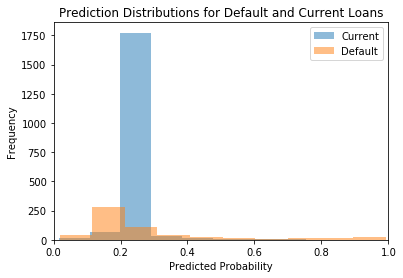

/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/neiloza/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


the Precision is 0.0
the Recall is 0.0


/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


the f1 score is 0.0
the roc-auc score is 0.5868773202735136
the accuracy score is 0.7724
The number of loans predicted to default is 0 out of a test size of 2500


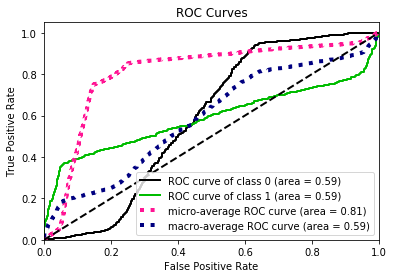

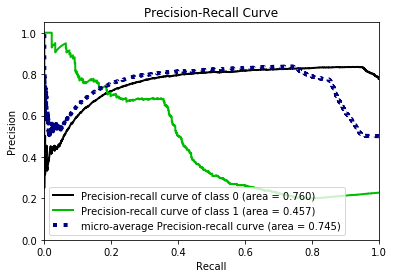

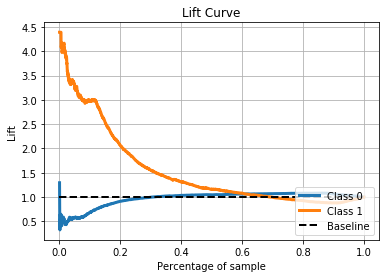

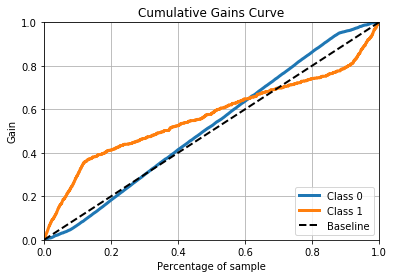

In [26]:
evaluate_model(X_normed_mean,y,svc)

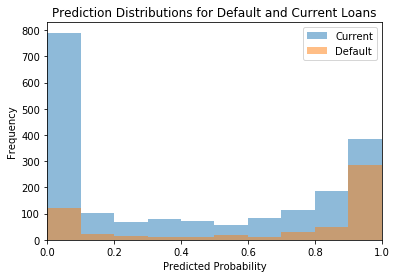

/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/neiloza/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


the Precision is 0.3231657048639736
the Recall is 0.6889279437609842
the f1 score is 0.4399551066217733
the roc-auc score is 0.6858698926678675
the accuracy score is 0.6008
The number of loans predicted to default is 1213 out of a test size of 2500


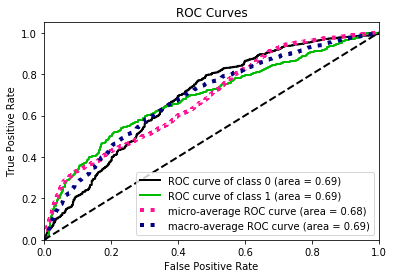

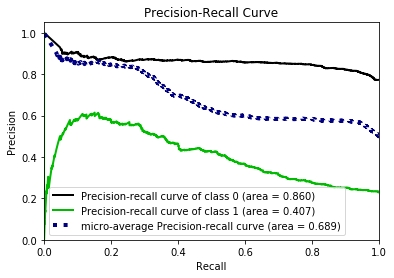

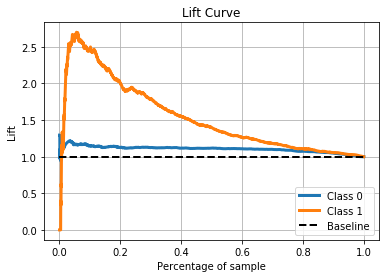

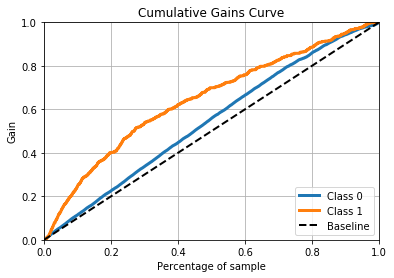

In [27]:
evaluate_model(X_fillna_median,y,gnb)

It seems that random forest performs the best at baseline. Next let's see what happens when we tune hyperparameters

In [28]:
from sklearn.model_selection import GridSearchCV
def tune_hyperparameters(X,y,params, model):
    gcv=GridSearchCV(model,params,cv=5,scoring='recall')
    func_X_train,func_X_test,func_y_train, func_y_test=train_test_split(X,y,test_size=.25,random_state=42)
    gcv.fit(func_X_train,func_y_train)
    print("best params are "+ str(gcv.best_params_))
    print("best score is "+ str(gcv.best_score_))






In [29]:
rf_params={'n_estimators':[100],'max_depth':[25,30,35],'max_features':[.30,.35,.40]}
tune_hyperparameters(X_fillna_median,y,rf_params,rf)

best params are {'max_depth': 30, 'max_features': 0.3, 'n_estimators': 100}
best score is 0.4736936617240512


best params are {'var_smoothing': 0.001}
best score is 0.8010505989779677


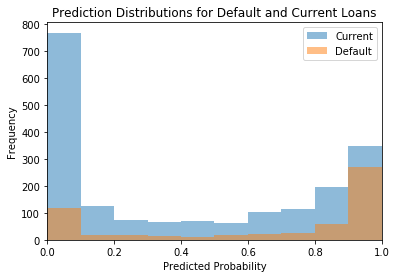

/Users/neiloza/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/neiloza/miniconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


the Precision is 0.31986809563066776
the Recall is 0.6818980667838312
the f1 score is 0.4354657687991021
the roc-auc score is 0.6857961717933012
the accuracy score is 0.5976
The number of loans predicted to default is 1213 out of a test size of 2500


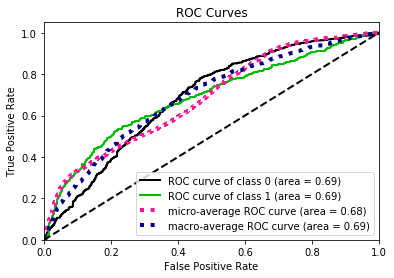

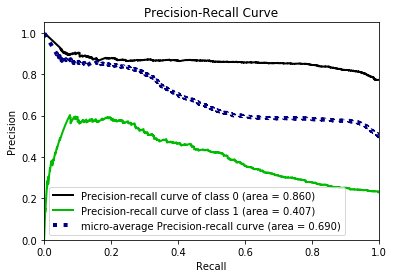

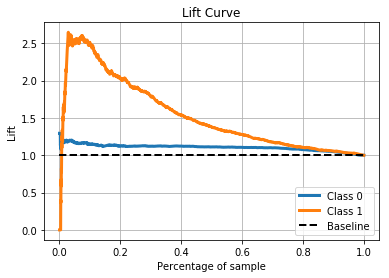

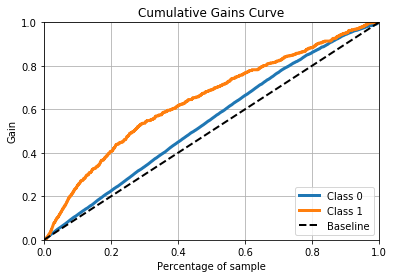

In [30]:
gnb_params={'var_smoothing':[.001,.01,.1,1,2]}
tune_hyperparameters(X_fillna_mean,y,gnb_params,gnb)
evaluate_model(X_fillna_mean,y,gnb)

In [31]:
log_params={'penalty':['l1','l2'],'C':[.1,.5,1,2,3]}
tune_hyperparameters(X_normed_mean,y,log_params,lr)

NameError: name 'mean_X_train' is not defined

In [ ]:
lr=LogisticRegression(C=2,penalty='l1')
evaluate_model(X_fillna_mean,y,lr)

In [ ]:
gnb=GaussianNB(var_smoothing=.0001)
evaluate_model(X_fillna_mean,y,gnb)